### PART 1 : Data Preprocessing

In [647]:
# import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import time # to measure how long the models take
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve,roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV


### Data cleaning

In [648]:
# Reading training and testing data

df = pd.read_csv(r'C:\Users\YUCHENG WANG\Desktop\MBAN FALL\MBAN 6120 data science II\data\train.csv',sep=';')
df2 = pd.read_csv(r'C:\Users\YUCHENG WANG\Desktop\MBAN FALL\MBAN 6120 data science II\data\test.csv',sep=';')


In [649]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [650]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [651]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


Now, we will clean the data, including filling in missing values and drop any duplicate rows in the training dataset.

In [652]:
# find any missing values.
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

seems there is no missing value in the train dataset.

In [653]:
# find any duplicate rows.
df.duplicated().sum()

0

The result shows there is no duplications in this dataset as well.

We are now finished the data cleaning steps! Our final DataFrame has 45211 entries we can use for analysis. 
* We try to dropped rows that had missing values,however there're no missing values in this dataset.
* we try to drop any duplications as well, however there're also no duplications in this dataset as well.

### Data Exploration

Let's explore the data types and descriptive statistics for each column.


In [654]:
df_types = df.dtypes
df_types

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

From the summary of data types, we can distinguished the Numerical Columns are 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'.
The Categorical Columns are 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'.

In [655]:
descriptive_stats = df.describe()
print(descriptive_stats)

                age        balance           day      duration      campaign   
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000  \
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

We did the descriptive analysis here, and we found that the average age of the client cohort is around 41.
The average balance is approximately 1362, however the standard deviation is the highest among all numerical variables, suggesting a significant variation.
Average call duration is around 258 seconds.
The average number of contacts performed during the campaign for a client is 2.76.
The average number of days since the client was last contacted is 40days. Most of the client was not previously contacted(pdays= -1). The maximum value is 871 days.
Previous ranges from 0 to 275, indicating the number of contacts performed before this campaign. Again, most of the client was not previously contacted.

Now we're going to figure out the distribution of categorical columns and the target variable y.

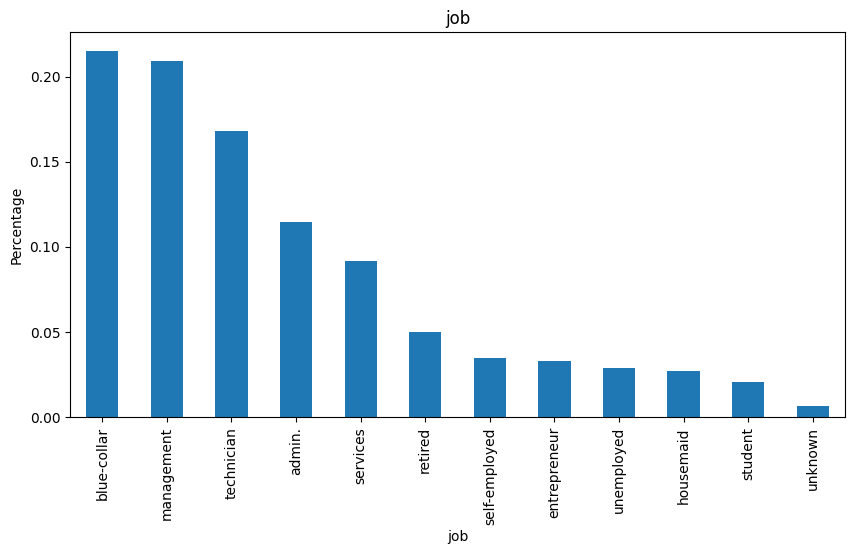

In [656]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
df['job'].value_counts(normalize=True).plot(kind='bar')
plt.title('job')
plt.ylabel('Percentage')
plt.show()

From the graph, we can found that most client's job is in the blue-collar field, the second most is in the management.

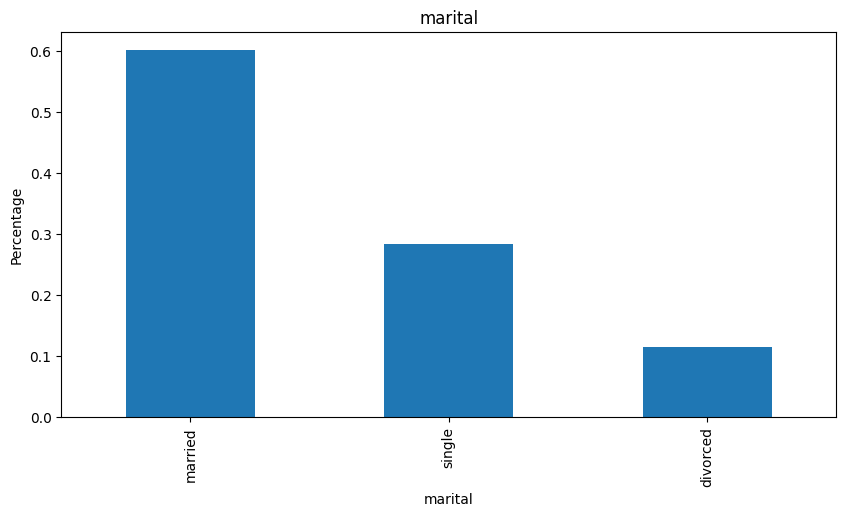

In [657]:
plt.figure(figsize=(10, 5))
df['marital'].value_counts(normalize=True).plot(kind='bar')
plt.title('marital')
plt.ylabel('Percentage')
plt.show()

We can found that most of our client are married person.

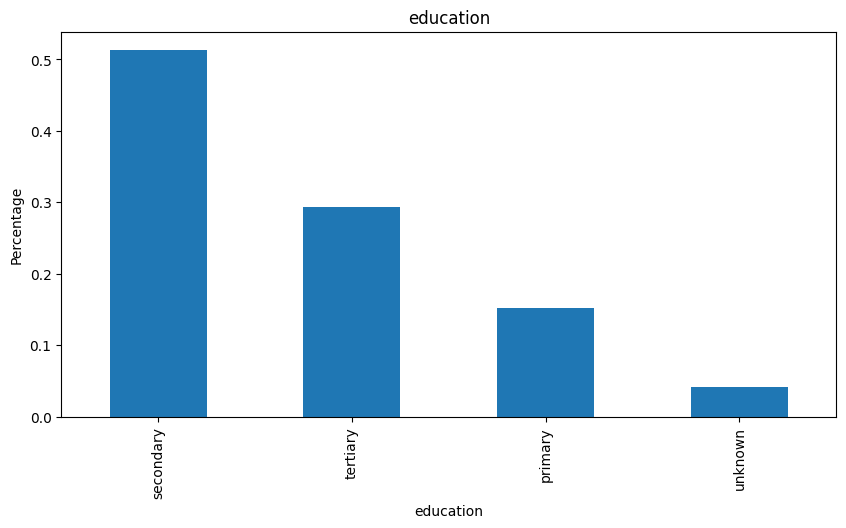

In [658]:
plt.figure(figsize=(10, 5))
df['education'].value_counts(normalize=True).plot(kind='bar')
plt.title('education')
plt.ylabel('Percentage')
plt.show()


Most clients have 'secondary' or 'tertiary' education. A small portion has an 'unknown' education level.

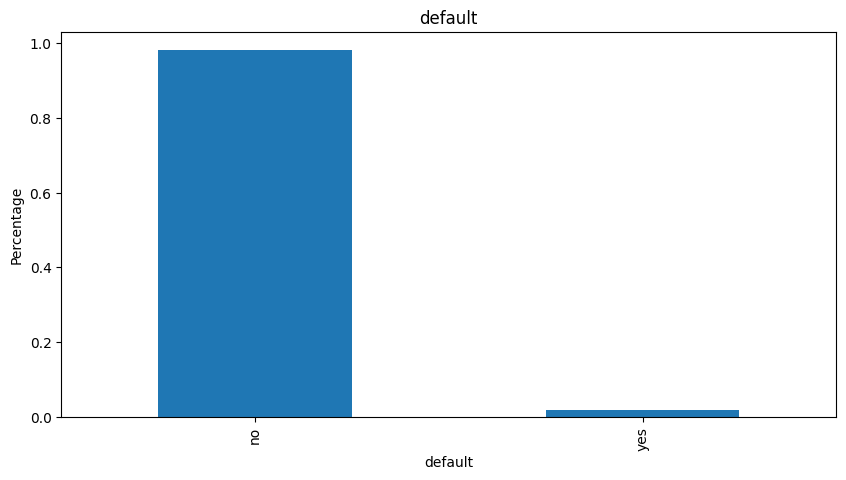

In [659]:
plt.figure(figsize=(10, 5))
df['default'].value_counts(normalize=True).plot(kind='bar')
plt.title('default')
plt.ylabel('Percentage')
plt.show()

Most of the client have no default record.

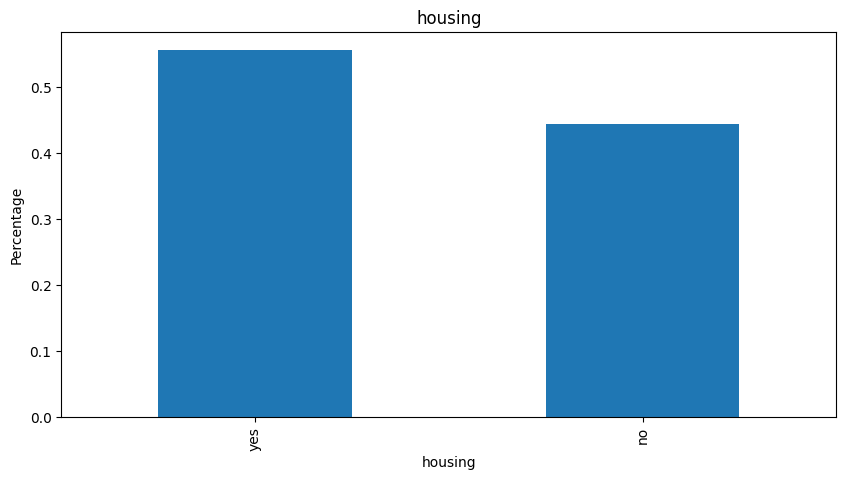

In [660]:
plt.figure(figsize=(10, 5))
df['housing'].value_counts(normalize=True).plot(kind='bar')
plt.title('housing')
plt.ylabel('Percentage')
plt.show()

More than 50% of the client have a housing loan.

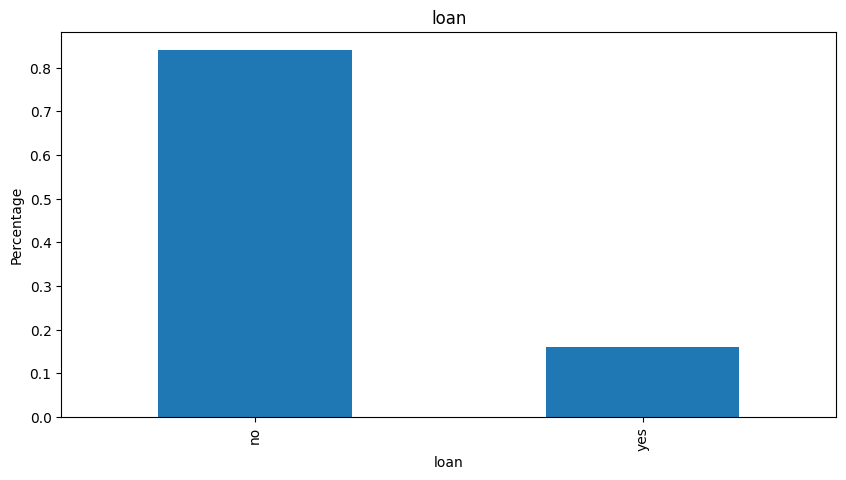

In [661]:
plt.figure(figsize=(10, 5))
df['loan'].value_counts(normalize=True).plot(kind='bar')
plt.title('loan')
plt.ylabel('Percentage')
plt.show()


Most of the client do not have a personal loan.

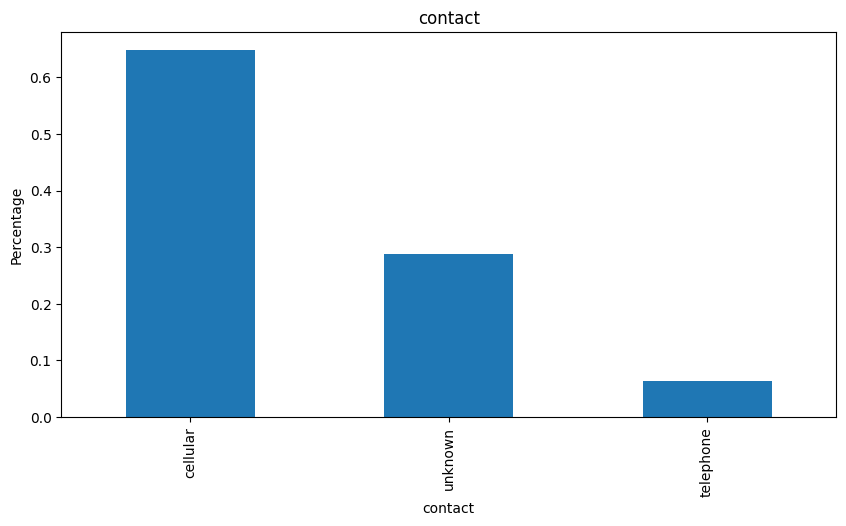

In [662]:
plt.figure(figsize=(10, 5))
df['contact'].value_counts(normalize=True).plot(kind='bar')
plt.title('contact')
plt.ylabel('Percentage')
plt.show()

Most of the client were contacted by cellular, the least of the client were contacted by telephone. However, the second contact type was remained unknown which may inquire further investigation.

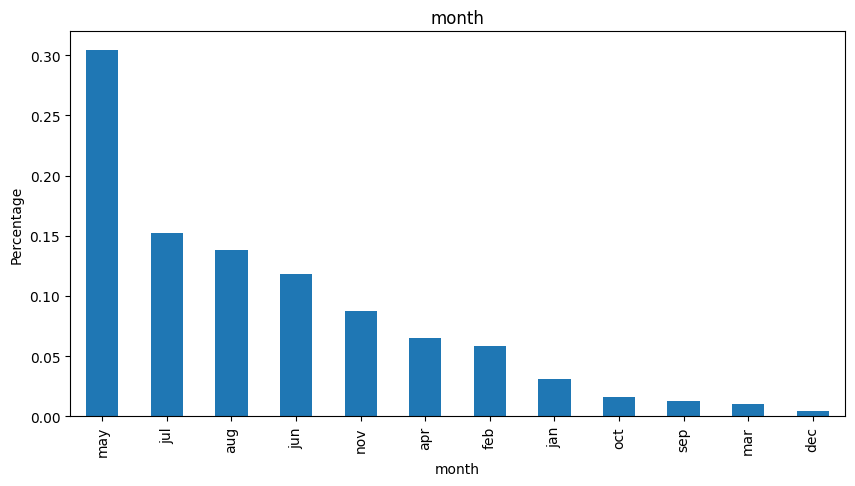

In [663]:
plt.figure(figsize=(10, 5))
df['month'].value_counts(normalize=True).plot(kind='bar')
plt.title('month')
plt.ylabel('Percentage')
plt.show()

Most of our client were contacted in May.

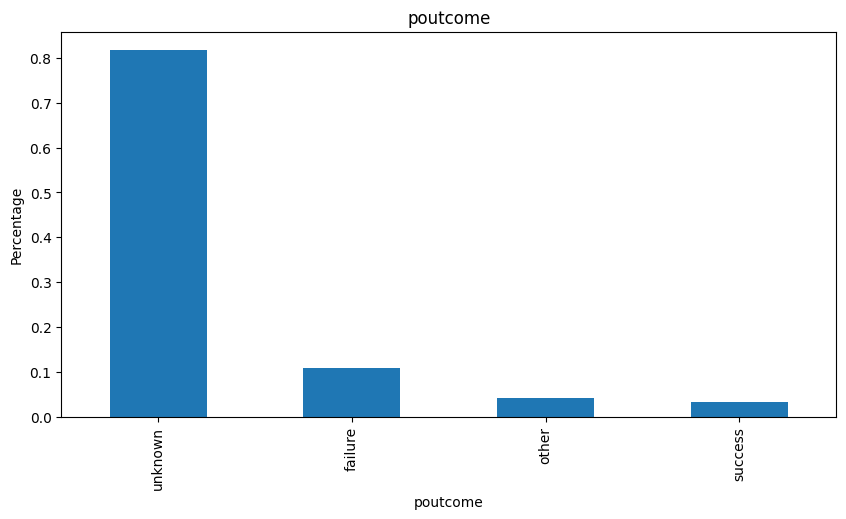

In [664]:
plt.figure(figsize=(10, 5))
df['poutcome'].value_counts(normalize=True).plot(kind='bar')
plt.title('poutcome')
plt.ylabel('Percentage')
plt.show()

Most clients have an 'unknown' outcome from the previous marketing campaign, followed by 'failure', 'other', and 'success'.The 'unknown' situation may need handling during the modelling part.

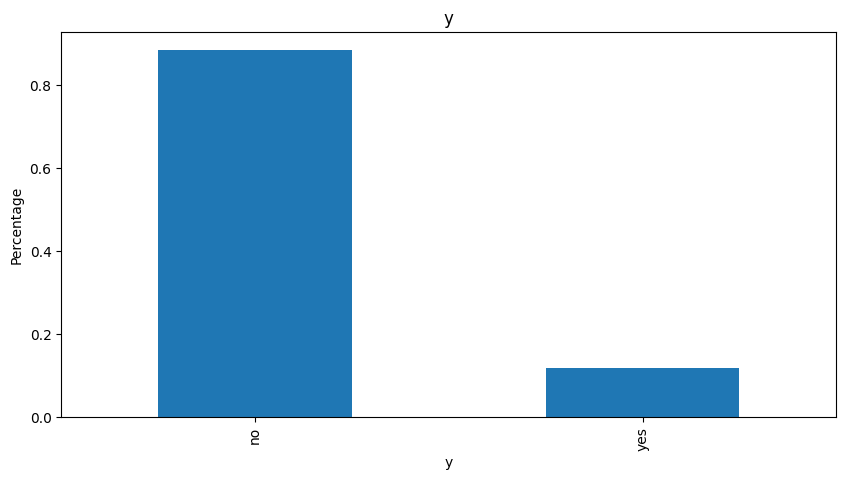

In [665]:
plt.figure(figsize=(10, 5))
df['y'].value_counts(normalize=True).plot(kind='bar')
plt.title('y')
plt.ylabel('Percentage')
plt.show()

The majority of our client did not subscribe to the term deposit, which shows a certain level of data imbalance.

### Data Preprocessing
* we try to preprocess the data using the label Encode, StandardScaler and OneHotEncode.

In [666]:
# Performing Label Encoding 
edu = {'unknown': 0, 
       'primary': 1,
       'secondary': 2,
       'tertiary': 3}

In [667]:
# On Training Dataset
df['education'] = df['education'].replace(edu)
# On Testing Dataset
df2['education'] = df2['education'].replace(edu)

print(df2['education'].value_counts())

education
2    2306
3    1350
1     678
0     187
Name: count, dtype: int64


In [668]:
pou = {'unknown': 0, 
       'failure': 1,
       'success': 2,
       'other': 3}

In [669]:
# On Training Dataset
df['poutcome'] = df['poutcome'].replace(pou)
# On Testing Dataset
df2['poutcome'] = df2['poutcome'].replace(pou)

print(df2['poutcome'].value_counts())

poutcome
0    3705
1     490
3     197
2     129
Name: count, dtype: int64


In [670]:
cont = {'unknown' : 0,
        'cellular': 1,
        'telephone': 2}

In [671]:
df['contact'] = df['contact'].replace(cont)
# On Testing Dataset
df2['contact'] = df2['contact'].replace(cont)

print(df2['contact'].value_counts())

contact
1    2896
0    1324
2     301
Name: count, dtype: int64


In [672]:
hou = {'no' : 0,
       'yes': 1}

In [673]:
df['housing'] = df['housing'].replace(hou)
# On Testing Dataset
df2['housing'] = df2['housing'].replace(hou)

print(df2['housing'].value_counts())

housing
1    2559
0    1962
Name: count, dtype: int64


In [674]:
defu = {'no' : 0,
       'yes': 1}

In [675]:
df['default'] = df['default'].replace(defu)
# On Testing Dataset
df2['default'] = df2['default'].replace(defu)

print(df2['default'].value_counts())

default
0    4445
1      76
Name: count, dtype: int64


In [676]:
loa = {'no' : 0,
       'yes': 1}

In [677]:
df['loan'] = df['loan'].replace(loa)
# On Testing Dataset
df2['loan'] = df2['loan'].replace(loa)

print(df2['loan'].value_counts())

loan
0    3830
1     691
Name: count, dtype: int64


In [678]:
outcome = {'no' : 0,
           'yes': 1}

In [679]:
df['y'] = df['y'].replace(outcome)
# On Testing Dataset
df2['y'] = df2['y'].replace(outcome)

print(df2['y'].value_counts())

y
0    4000
1     521
Name: count, dtype: int64


In [681]:
# Identify numerical, categorical columns and target variable
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [682]:
# Add transformations to the pipeline
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [683]:
# Construct preprocessing pipeline
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_cols),
                                                 ('num', num_transformer, num_cols)])

When preprocessing the dataset, our initial step involved label encoding for certain categorical variables as well as the target variable (y). We also identified the specific numerical and categorical columns within the dataset.

Subsequently, we incorporated several transformations into our pipeline. We applied 'one-hot encoding' to convert each categorical column into dummy variables, effectively representing categorical data in a numerical format. Additionally, we carefully managed 'unknown' values within this pipeline to prevent any potential impact on subsequent modeling stages.

For the numerical values, we utilized the 'StandardScaler' to standardize them, ensuring that they all have a mean of 0 and a variance of 1. This standardization process was employed to mitigate the influence of extreme data scales on our modeling outcomes.

### Part 2 to Part 4: Building Baseline Models, Ensemble modelling and Performance comparision

First we will split data into training and testing, then we try to build the baseline model and the ensemble modelling, we implement the loop through list of models to compare performance.

In [684]:
# Split data into Train and test
y = df["y"]
X = df.drop("y", axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = df2.drop('y',axis = 1)
y_test = df2['y']

In [685]:
X_train.shape

(36168, 16)

In [686]:
X_test.shape

(4521, 16)

In [687]:
y_train.shape

(36168,)

In [688]:
y_test.shape

(4521,)

In [708]:
# Build the baseline model(KNN and logistic) and ensemble modelling, for ensuring the prediction accuracy, we added some initial parameters including hhe number of neighbours for KNN and max_depth for the random forest.
knn = KNeighborsClassifier(n_neighbors=10)
log_reg = LogisticRegression(C=0.1) 
rf = RandomForestClassifier(n_estimators=100, max_depth=20)
ada = AdaBoostClassifier(n_estimators=50)  
bag_classifier = BaggingClassifier(base_estimator=knn, n_estimators=10) 
voting_hard = VotingClassifier(estimators=[('rf', rf), ('knn', knn), ('ada', ada)], voting='hard')
voting_soft = VotingClassifier(estimators=[('rf', rf), ('knn', knn), ('ada', ada)], voting='soft')

In [698]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag_classifier,
    'Voting_hard': voting_hard,
    'Voting_soft': voting_soft   
}

In [704]:
results = {}

In [705]:
# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred, pos_label= 1)
    recall = recall_score(y_test, y_pred, pos_label= 1)
    f1 = f1_score(y_test, y_pred, pos_label= 1)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

d:\python3.11\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


                     Precision    Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.700000  0.147793  0.244057  0.894492  0.465441
Logistic Regression   0.607143  0.130518  0.214850  0.890069  0.344335
Random Forest         0.786325  0.176583  0.288401  0.899580  2.034924
AdaBoost              0.574468  0.155470  0.244713  0.889405  1.677166
Bagging               0.697368  0.203455  0.315007  0.898031  2.702766
Voting_hard           0.787037  0.163148  0.270270  0.898474  4.262185
Voting_soft           0.768595  0.178503  0.289720  0.899137  3.930727


From the output, we can discover that:
* The K-Nearest Neighbors (KNN) model demonstrated the high precision, indicating its proficiency in predicting clients who subscribed to a term deposit. However, it had a relatively low recall, suggesting that it tended to misclassify some clients who actually subscribed as those who did not. Consequently, the F1-score was modest, and although the accuracy was high, the computational time was reasonably efficient.
* In contrast, logistic regression showed low precision and recall, resulting in a poor F1-score and accuracy. Nevertheless, it was the fastest among the evaluated models.
* The Random Forest model exhibited exceptional precision, especially in predicting clients who subscribed to a term deposit, with a reasonably high recall and F1-score. However, this came at the cost of extended computational time.
* AdaBoost presented a balanced performance with moderate precision, recall, and F1-score, along with high accuracy. It was more efficient than Random Forest but slower than Logistic Regression.
* Bagging showcased good precision and a decent F1-score, indicating its capability in predicting clients who subscribed to a term deposit. While its recall was moderate, the model achieved a high level of accuracy and operated at an efficient computational speed.
* The Voting Classifier allowed for the combination of different models, resulting in a trade-off between precision and recall. In "hard" voting mode, it achieved high precision and moderate recall, while in "soft" voting mode, precision remained high, and recall improved significantly. Consequently, the F1-score and accuracy were notably better in "soft" voting.

In [706]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

Next step, we process the hyperparameter tuning.

In [707]:
# Import additional libraries
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for tuning
knn_params = {'classifier__n_neighbors': [20, 30, 50, 100, 300]}
log_reg_params = {'classifier__C': [ 1, 10]}
rf_params = {'classifier__n_estimators': [50, 100, 150,200], 'classifier__max_depth': [20, 30, 50]}
ada_params = {'classifier__n_estimators': [200,300]}
bag_params = {'classifier__n_estimators': [5, 10, 20, 30, 50]}
voting_hard_params = {'classifier__voting': ['hard']}
voting_soft_params = {'classifier__voting': ['soft']}

params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'Voting_hard': voting_hard_params,
    'Voting_soft': voting_soft_params
}

# Initialize results dictionary for tuned models
tuned_results = {}

# Loop through classifiers for tuning
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_train, y_train)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred, pos_label= 1)
    recall = recall_score(y_test, y_pred, pos_label= 1)
    f1 = f1_score(y_test, y_pred, pos_label= 1)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df);

d:\python3.11\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\python3.11\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\python3.11\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\python3.11\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\python3.11\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\python3.11\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estima

                                                           Best Params   
K-Nearest Neighbors                    {'classifier__n_neighbors': 20}  \
Logistic Regression                              {'classifier__C': 10}   
Random Forest        {'classifier__max_depth': 20, 'classifier__n_e...   
AdaBoost                             {'classifier__n_estimators': 300}   
Bagging                               {'classifier__n_estimators': 30}   
Voting_hard                             {'classifier__voting': 'hard'}   
Voting_soft                             {'classifier__voting': 'soft'}   

                    Precision    Recall  F1-Score    Time (s)  
K-Nearest Neighbors  0.695652  0.122841  0.208809   17.417774  
Logistic Regression  0.586777  0.136276  0.221184    2.861352  
Random Forest        0.960159  0.462572  0.624352  210.260486  
AdaBoost             0.601504  0.153551  0.244648   77.791965  
Bagging              0.695035    0.1881  0.296073  345.730559  
Voting_hard          0.


After hyperparameter tuning, 
* Knn resulting in declined in precision and recall, also computational time increased.
* Logistic Regression with tuned parameters showed similar precision, but reacall and F1-score slightly increased also computation time increased.
* Random Forest reached exceptional performance, with substantially improved precision, recall, and F1-score, although computational time has increased a lot.
* AdaBoost with adjusted hyperparameters achieved better precision, while computational time increased.
* Bagging exhibited similar precision and lower f1-score and recall with hyperparameter tuning, but computational time increased.
* The Voting Classifier with tuned parameters maintained its trade-off between precision and recall.


Overall, the Random Forest model demonstrated the most substantial performance improvement, leading to the preference for this model due to its enhanced performance.


### Part 5: Interpretation and Justification

1. Why did the ensemble models perform the way they did?

Just as in real-life situations, we often consider the advice of others before making decisions. Similarly, ensemble modeling operates on the principle of combining predictions from different models to enhance forecasting accuracy. This process of combining predictions does introduce additional time overhead, as evidenced by the extended computation times for ensemble models like Random Forest, AdaBoost, Bagging, and Voting when compared to the base KNN and Logistic models.

It's important to note that, without hyperparameter tuning, Voting stands out as the most time-consuming model, potentially due to its exploration of both hard and soft voting methods. This outcome aligns perfectly with my expectations. Using ensemble modeling can be viewed as a trade-off between model accuracy and efficiency. Analyzing the results, we can observe that nearly all ensemble models deliver improved performance metrics at the cost of relatively longer computation times compared to the base KNN and Logistic models. This situation typically represents a trade-off between accuracy and efficiency.

2. If you had to pick one model to implement in business process, which would it be and why?

For the implementation of the model into the business process, I believe that the Random Forest model is the most suitable choice. Firstly, let's delve into its performance metrics, and we can readily observe that the Random Forest model showcases not only relatively high precision but also high recall and F1-score when compared to all the other models. This indicates a remarkable level of stability and accuracy in the prediction results, a feature not as prominently observed in other models. Moreover, following hyperparameter tuning, the Random Forest model emerges as the top performer among all models, albeit with the second-longest computation time. Indeed, achieving high performance often requires more time, but the elevated accuracy justifies the investment.

From a business insight perspective, Random Forest offers valuable insights to banks. It aids in identifying the most critical customer characteristics for predicting client subscription decisions, including factors such as job, marital status, age, balance, and more. This deeper understanding of customer behavior and characteristics can be leveraged for crafting more targeted marketing strategies, ultimately enhancing campaign effectiveness.

Additionally, Random Forest proves advantageous in handling missing values within our data. Its robustness to missing data arises from its decision-making process, which involves aggregating decisions from multiple trees. This property makes Random Forest less susceptible to the impact of extreme values and missing information.

3.	What decision criteria did you use to arrive at this conclusion? Precision-Recall trade-off? Computational cost? Others?

The decision criteria I used to arrive at the conclusion of selecting the Random Forest model for implementation into the business process are primarily based on the following factors:

Performance Metrics: I considered a combination of precision, recall, and F1-score as crucial performance metrics. After hyperparameter tuning, the Random Forest model exhibited top precision, high recall, and F1-score among all the models. These metrics indicate the model's ability to make accurate positive predictions (precision) and effectively capture most of the actual positives (recall), resulting in a well-balanced and high-performing model. Even the computation time is much longer than the other models, however, in the reality business word, sometimes accuracy is more important than efficiency. Moreover, The F1-score is particularly significant when dealing with imbalanced datasets, making Random Forest a strong candidate.

Stability and Accuracy: The Random Forest model showed high stability and accuracy in its prediction results, which were not found in other models. Stability is crucial in real-world applications to ensure consistent and reliable predictions over time. The relatively high F1-score reflects the model's accuracy, making it a robust choice for the business process.

Business Insights: Random Forest's ability to provide feature importance assessments is a crucial factor. This allows the bank to gain insights into which customer characteristics are most critical for predicting renewal decisions. Understanding these features can inform targeted marketing strategies and other business decisions, providing valuable insights beyond predictive performance.

Robustness to Missing Values: The mention of having a lot of unknown values in the data is an important practical consideration. Random Forest is relatively robust to missing values, which is advantageous when dealing with real-world datasets that often contain incomplete information. The model's ability to handle missing values is a practical benefit for this business scenario.

In summary, the decision to choose the Random Forest model was based on a combination of its exceptional performance metrics, stability, business insights, and robustness to missing values. These factors collectively make it a strong candidate for implementation into the business process of predicting customer subscribed decisions.
